<a href="https://colab.research.google.com/github/fionisarnen/predictionhouseprice/blob/master/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Library Pendukung**



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

**Mengunduh Dataset**

In [0]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-12-09 06:36:47--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.02s   

2019-12-09 06:36:47 (22.3 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



**Membaca Dataset kc_house_data.csv**

In [0]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0



**Data Checking**
*   Memeriksa apakah dataset memiliki nilai kosong
*   Memeriksa tipe data
*   Memeriksa persebaran statistik data 
*   Menggambarkan visualisasi perseberan harga rumah berdasarkan luas rumah
*   Visualisasi nilai korelasi antar seluruh fitur dengan target fitur yang akan diprediksi yaitu "price"







In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 21 columns):
id               3165 non-null int64
date             3165 non-null object
price            3165 non-null float64
bedrooms         3165 non-null int64
bathrooms        3165 non-null float64
sqft_living      3165 non-null int64
sqft_lot         3165 non-null int64
floors           3165 non-null float64
waterfront       3165 non-null int64
view             3165 non-null int64
condition        3165 non-null int64
grade            3165 non-null int64
sqft_above       3165 non-null int64
sqft_basement    3165 non-null int64
yr_built         3165 non-null int64
yr_renovated     3165 non-null int64
zipcode          3165 non-null int64
lat              3165 non-null float64
long             3165 non-null float64
sqft_living15    3164 non-null float64
sqft_lot15       3164 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 519.3+ KB


In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    1
sqft_lot15       1
dtype: int64

In [0]:
data = df.drop(columns=['id','date'])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3164.000000,3164.000000
mean,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,98077.137757,47.557908,-122.212364,1982.544564,13176.302465
std,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,54.169012,0.140785,0.139564,686.256670,25413.180755
min,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5429.500000
50%,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7873.000000
75%,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680400,-122.124000,2360.000000,10408.250000
max,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


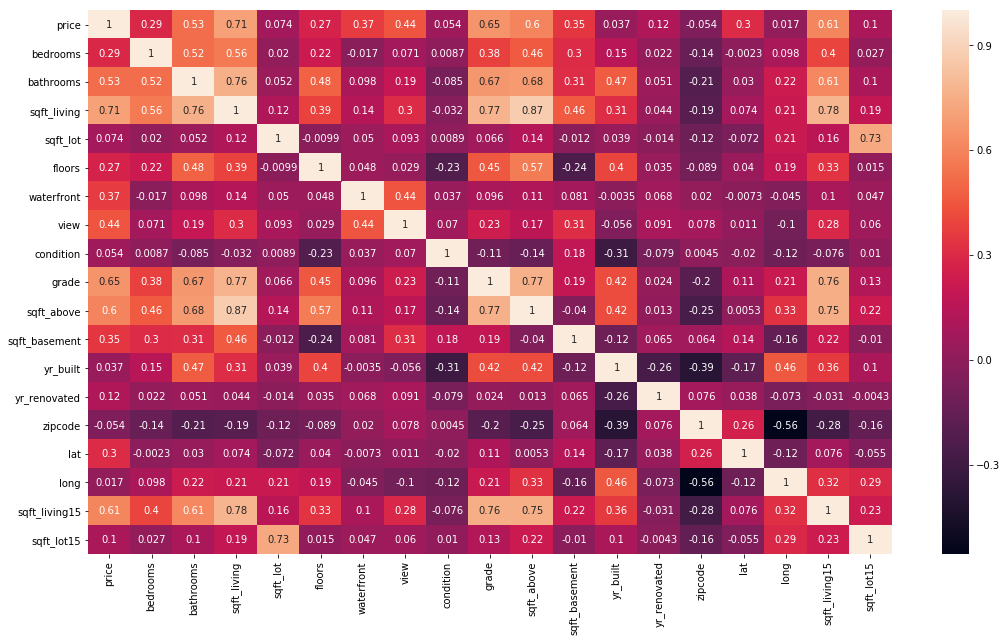

In [0]:
#data = df.drop(columns=['id','date'])
corr = data.corr()
f = plt.subplots(figsize=(18,10))
sns.heatmap(corr,annot=True)

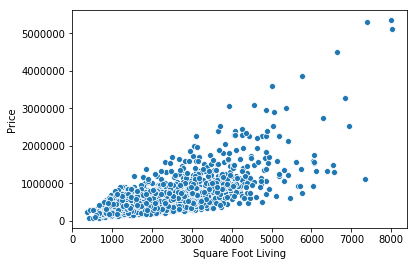

In [0]:
data1 = data[["price","sqft_living"]]
ax = sns.scatterplot(data1["sqft_living"],data1["price"])
ax.set(xlabel="Square Foot Living", ylabel="Price")
plt.show()

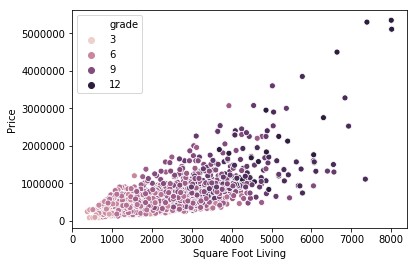

In [0]:
data3 = data[["sqft_living","grade","price"]]
ax = sns.scatterplot(data3["sqft_living"],data3["price"],data3["grade"])
ax.set(xlabel="Square Foot Living",ylabel="Price")
plt.show()

In [0]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


Dari visualisasi nilai korelasi fitur dengan target fitur "price" diatas maka dapat disimpulkan fitur dengan nilai korelasi paling tinggi (>=0.5) adalah
1. "sqft_living" = 0.71
2. "grade" = 0.65
3. "sqft_above" = 0.6
4. "sqft_living15" = 0.61
5. "bathrooms" = 0.53

Nantinya ke-5 fitur yang sudah dipilih akan diseleksi kembali agar didapatkan inputan fitur yang dapat menjadi model regresi dengan hasil maksimal 



In [0]:
data = data.drop(['bedrooms','floors','waterfront','sqft_lot','condition','yr_built','yr_renovated','zipcode','long','lat','sqft_lot15','sqft_basement','view'],axis=1)
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340.0
1,538000.0,2.25,2570,7,2170,1690.0
2,180000.0,1.00,770,6,770,2720.0
3,604000.0,3.00,1960,7,1050,1360.0
4,510000.0,2.00,1680,8,1680,1800.0


**Feature Selection: RFE**

*   Menghapus nilai kosong pada fitur "sqft_living15"
*   Memisahkan 2 array array pertama berisi fitur target "price" 
* Array kedua berisi fitur-fitur yang akan diseleksi menggunakan RFE (Recursive Feature Elimination) 



In [0]:
data = data.dropna()
array = data.values
X = array[:,1:6]
Y = array[:,0]

*   Recursive Feature Elimination (RFE) menggunakan model estimator untuk mengurutkan fitur. RFE bekerja dengan menghapus fitur secara rekursif dan membangun model dengan atribut tersisa
* Lalu model akan mengidentifikasi fitur mana yang paling berkontribusi untuk memprediksi fitur target "price" dalam array Y
*   Jumlah fitur yang dicari diperkecil menjadi 2
* Dengan menyeleksi fitur diharapkan dapat mengurangi overfitting, meningkatkan akurasi dan mempersingkat waktu training



In [0]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
regressor=SVR(kernel='linear',C=10,gamma='auto')
rfe = RFE(regressor,2)
fit = rfe.fit(X,Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 2
Selected Features: [False  True  True False False]
Feature Ranking: [2 1 1 4 3]


* Dari penyeleksian diatas didapatkan 2 fitur terbaik yaitu "sqft_living" dan "grade"
* Membuat model regressi untuk memprediksi data training dan data testing dengan fitur terpilih

In [0]:
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340.0
1,538000.0,2.25,2570,7,2170,1690.0
2,180000.0,1.00,770,6,770,2720.0
3,604000.0,3.00,1960,7,1050,1360.0
4,510000.0,2.00,1680,8,1680,1800.0


Membuat Model dengan fitur terbaik yang sudah dicari

In [0]:
target = data['price']

In [0]:
features = data.drop(['price','sqft_above','bathrooms','sqft_living15'], axis=1)

In [0]:
features.head()

,sqft_living,grade
0,1180,7
1,2570,7
2,770,6
3,1960,7
4,1680,8


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=200) 

In [0]:
regressor=SVR(kernel='linear',C=500,gamma='auto')
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,pred))

**Metrics Evaluation: R-square, MSE, RMSE, MAE**


*   R-square 
*   MSE : Menghitung nilai rata-rata error dari fitur test "price" dengan nilai "price" terprediksi
* RMSE : Sederhananya, menghitung akar dari nilai MSE
* MAE : Menghitung seberapa dekat prediksi dari nilai sebenarnya (jumlah rata-rata perbedaan antara "price" pada data test dengan "price" terprediksi



In [0]:
print(r2_score(y_test, pred))

0.4738581803818499


In [0]:
print(mean_squared_error(y_test, pred))

59577931739.83037


In [0]:
print(rmse)

244085.910572


In [0]:
print(mean_absolute_error(y_test,pred))

151316.62984403153


Evaluation on Data Train

In [0]:
regressor=SVR(kernel='linear',C=500,gamma='auto')
regressor.fit(X_train, y_train)
pred=regressor.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,pred))

In [0]:
print(r2_score(y_train, pred))

0.48061201619735494
